In [4]:
import numpy as np 
import pandas as pd

In [5]:
data = pd.read_csv("nlp_data_clean.csv")

In [16]:
from matplotlib import pyplot as plt

(array([3.600e+01, 3.600e+01, 3.270e+02, 3.900e+02, 4.520e+02, 4.560e+02,
        6.300e+01, 1.100e+01, 4.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
        8.000e+00, 5.000e+00, 9.400e+01, 1.000e+02, 1.000e+02, 1.181e+03]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 18 artists>)

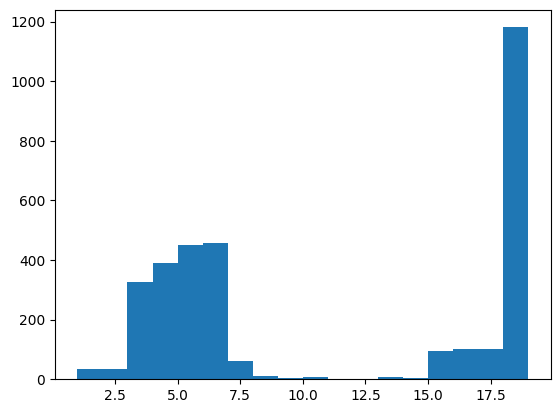

In [17]:
plt.hist(data['y'],bins=[x for x in range(1,20)])

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

2024-06-22 10:34:37.061240: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
x = data['x']
y = data['y']

In [20]:
token = Tokenizer()
token.fit_on_texts(x)
sequences = token.texts_to_sequences(x)

In [21]:
x = pad_sequences(sequences)

In [22]:
x

array([[  0,   0,   0, ..., 137,   1,  35],
       [  0,   0,   0, ...,   4,  11,  38],
       [  0,   0,   0, ...,  59,  32,  69],
       ...,
       [  0,   0,   0, ...,  33,   1,  63],
       [  0,   0,   0, ..., 155,   1,  63],
       [  0,   0,   0, ...,  94,  63, 237]], dtype=int32)

In [23]:
new_x = {
    'x0':[],
    'x1':[],
    'x2':[],
    'x3':[],
    'x4':[],
    'x5':[],
    'x6':[],
    'x7':[],
    'x8':[],
    'x9':[],
    'x10':[],
    'x11':[],
    'y':y
}


In [24]:
new_x

{'x0': [],
 'x1': [],
 'x2': [],
 'x3': [],
 'x4': [],
 'x5': [],
 'x6': [],
 'x7': [],
 'x8': [],
 'x9': [],
 'x10': [],
 'x11': [],
 'y': 0       3
 1       3
 2       3
 3       3
 4       3
        ..
 3267    7
 3268    7
 3269    7
 3270    7
 3271    7
 Name: y, Length: 3272, dtype: int64}

In [25]:
# this code conver a single x feathure into  12 feathures
for i in range(len(x)):
    for j in range(len(x[0])):
        new_x[f'x{j}'].append(x[i][j])

In [26]:
x[0][11]

35

In [27]:
new_x['x11'][0] #success

35

In [28]:
data = pd.DataFrame(new_x)

In [29]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,0,0,0,0,0,0,0,21,11,137,1,35,3
1,0,0,0,0,0,0,0,30,10,4,11,38,3
2,0,0,0,0,0,0,0,0,14,59,32,69,3
3,0,0,0,0,0,0,86,11,66,17,36,27,3
4,0,0,0,0,0,0,0,19,22,137,1,111,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,0,0,0,0,0,0,0,0,0,387,1,63,7
3268,0,0,0,0,0,0,0,0,94,1,183,93,7
3269,0,0,0,0,0,0,158,1,237,33,1,63,7
3270,0,0,0,0,128,2,4,179,94,155,1,63,7


# save the Tokenize

In [30]:
import pickle

In [31]:
pickle.dump(token, open('tokenizer.pkl','wb'))

In [32]:
!ls

NLP.ipynb          nlp_data_clean.csv tokenizer.pkl      train.csv


In [33]:
tt = pickle.load(open('tokenizer.pkl','rb'))

In [34]:
tt.word_index == token.word_index

True

# build a model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc

RandomForestClassifier()

In [38]:
x = data[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']]
y = data['y']

In [39]:
len(x) == len(y)

True

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_predict = rfc.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_predict)

In [44]:
score

0.8427480916030534

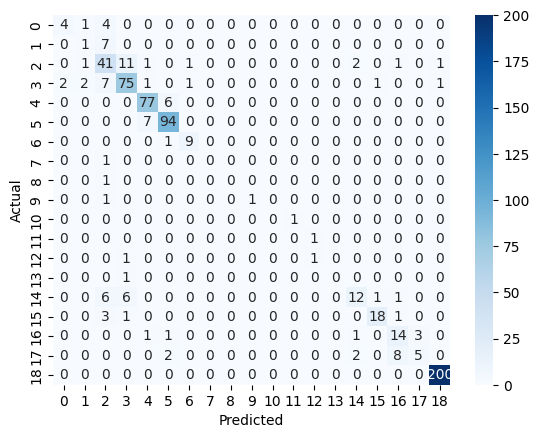

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [47]:
len(y_predict)

655

In [1]:
!ls

NLP.ipynb          nlp_data_clean.csv tokenizer.pkl      train.csv


In [6]:
!open nlp_data_clean.csv